# Project Title: Price model for airbnb listings in Geneva

## ANOVA and regressions

### Libraries and settings

In [2]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Style settings for plt
plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/project_arm_airbnb/data


### Import data from csv

In [3]:
# Import data from csv file 'listings_with_distances.csv'
df = pd.read_csv('analysis.csv')
print(df.shape)
df.head()

(1813, 20)


,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,0,22,409.552941,120.893645,4,3
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,0,51,375.547668,465.095061,1,0
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26,564.152315,460.109880,0,0
3,276025,Other,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48,6694.037169,162.973109,0,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26,795.419536,127.984620,0,2


### Create grouped box plot

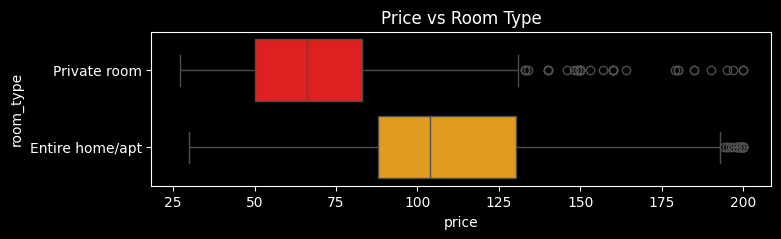

In [4]:
# Plot boxplot with price and room_type
plt.figure(figsize=(8, 2))
sns.boxplot(x='price', y='room_type', palette= ['red', 'orange'], data=df, orient='h')
plt.title('Price vs Room Type')
plt.show()


### Unpaired two-sample t-test

In [5]:
# create subsets for each room type
entire_home = df[df['room_type'] == 'Entire home/apt']
private_room = df[df['room_type'] == 'Private room']

# create t-test
t_test = stats.ttest_ind(entire_home['price'], private_room['price'])
print('Test-statistic:', t_test[0].round(5), 'p-value',  t_test[1].round(5))

Test-statistic: 23.41067 p-value 0.0


<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices differ between the room types of an 'Entire home/apt' and 'private room'. Hence, there is a statistically significant (5% significance level) difference between prices of the two room types. Based on the boxplot Price vs Room Type we can also infer that 'Entire home/apt' are more expensive than 'private room'. </p>

## Analysis of Variance (ANOVA)

In [6]:
# create ANOVA based on the subsets entire_home and private_room
fvalue, pvalue = stats.f_oneway(entire_home['price'],
                                private_room['price'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))


F-value: 548.06 p-value 0.0


<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices of 'Entire home/apt' and 'private room'differ.</p>

In [7]:
# create a subset of prices for each neighbourhood in the variable 'neighbourhood_cleansed'
neighbourhoods = df['neighbourhood_cleansed'].unique()
print(neighbourhoods)

# Create subsets for each specific neighbourhood
cdg = df.loc[df['neighbourhood_cleansed'] == 'Commune de Genève']
car = df.loc[df['neighbourhood_cleansed'] == 'Carouge']
gs = df.loc[df['neighbourhood_cleansed'] == 'Grand-Saconnex']
lan = df.loc[df['neighbourhood_cleansed'] == 'Lancy']
ver = df.loc[df['neighbourhood_cleansed'] == 'Vernier']

# create ANOVA based on the subsets cdg, car, gs, lan and ver
fvalue, pvalue = stats.f_oneway(cdg['price'],
                                car['price'],
                                gs['price'],
                                lan['price'],
                                ver['price'])
# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

['Commune de Genève' 'Other' 'Carouge' 'Grand-Saconnex' 'Lancy' 'Vernier']
F-value: 9.371 p-value 0.0


<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices in each specific neighbourhood is different. A further analysis based on the room_types per neighbourhood is difficult due to the limited amount of listings. The number of listings decrease in this case to 15 as shown in the pivot table in '3_EDA'.</p>

### Additional analysis based on ANOVA of neighbourhoods

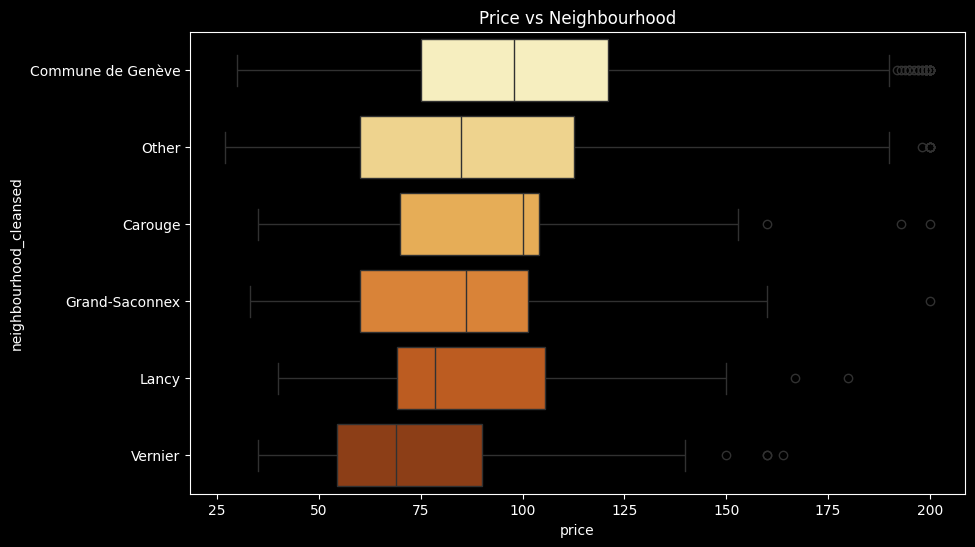

In [8]:
# create boxplot for the neighbourhoods and exclude the neighourhood 'others'
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', y='neighbourhood_cleansed', data=df, palette='YlOrBr')
plt.title('Price vs Neighbourhood')
plt.show()

## Multiple linear regression with two explanatory variables

### Libraries and settings

In [9]:
# Additional libraries
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Create train and test samples (train = 80%, test = 20% of the data)

In [10]:
# data frame 
print(df.shape)
df.head()

(1813, 20)


,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,0,22,409.552941,120.893645,4,3
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,0,51,375.547668,465.095061,1,0
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26,564.152315,460.109880,0,0
3,276025,Other,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48,6694.037169,162.973109,0,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26,795.419536,127.984620,0,2


In [11]:
# Create train and test samples 
X_train, X_test, y_train, y_test = train_test_split(df[['accommodates',
                                                        'lake_access',]], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X_train:')
print(X_train.head(), '\n')

# Show y2_train
print('y_train:')
print(y_train.head())

X_train:
      accommodates  lake_access
806              2            0
1304             1            1
864              1            0
1747             2            0
907              4            0 

y_train:
806      90.0
1304     85.0
864      85.0
1747     37.0
907     175.0
Name: price, dtype: float64


In [12]:
# Add constant to the model
X_train_const = sm.add_constant(X_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     197.2
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.83e-76
Time:                        12:59:26   Log-Likelihood:                -7148.6
No. Observations:                1450   AIC:                         1.430e+04
Df Residuals:                    1447   BIC:                         1.432e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           63.7923      1.942     32.847   

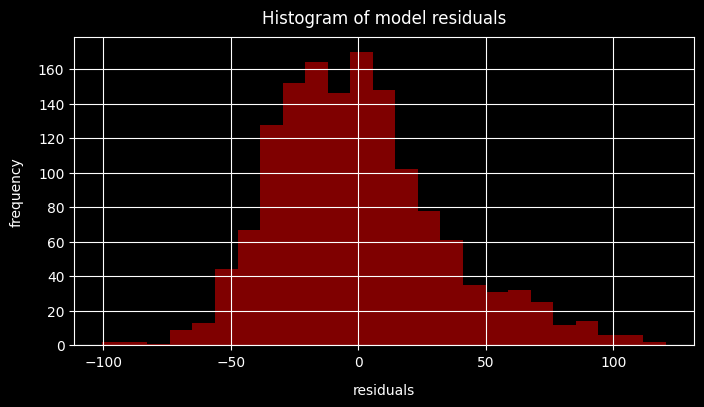

In [13]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='red',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()
plt.show()

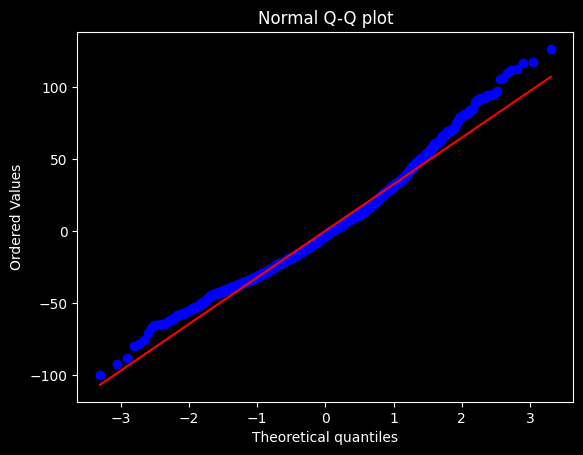

In [20]:
# check if residuals are normally distributed
stats.probplot(olsres.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [14]:
# Compare predicted values with actual values
# Add constant to X2_test
X_test_const = sm.add_constant(X_test)
predicted_new = olsres.predict(X_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 65.0, Predicted price: 91.0
Observed price: 64.0, Predicted price: 77.4
Observed price: 104.0, Predicted price: 91.0
Observed price: 70.0, Predicted price: 77.4
Observed price: 193.0, Predicted price: 91.0
Observed price: 40.0, Predicted price: 91.0
Observed price: 65.0, Predicted price: 91.0
Observed price: 50.0, Predicted price: 91.0
Observed price: 130.0, Predicted price: 77.4
Observed price: 70.0, Predicted price: 77.4


## Multiple linear regression with four explanatory variables

In [15]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['accommodates',
                                                            'bathrooms', 
                                                            'num_ta',
                                                            'dist_ta']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
      accommodates  bathrooms  num_ta      dist_ta
806              2        1.0       0  1203.581104
1304             1        1.0       0  7391.298286
864              1        1.0       0  1074.374245
1747             2        6.0       0  9466.589144
907              4        2.5       0   818.155323 

y2_train:
806      90.0
1304     85.0
864      85.0
1747     37.0
907     175.0
Name: price, dtype: float64


In [16]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     120.5
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           8.23e-89
Time:                        12:59:26   Log-Likelihood:                -7114.6
No. Observations:                1450   AIC:                         1.424e+04
Df Residuals:                    1445   BIC:                         1.427e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           57.4831      3.138     18.319   

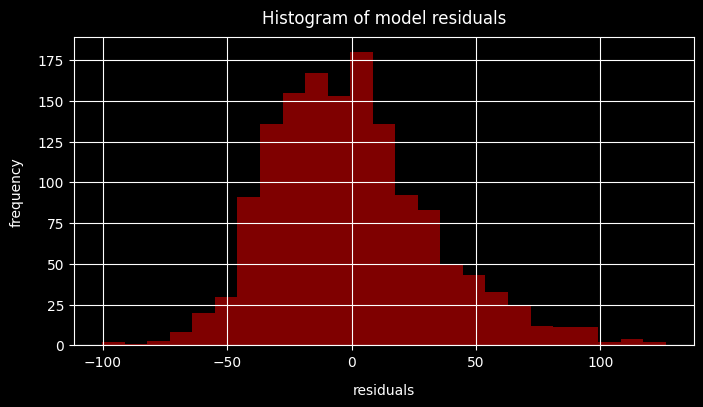

In [17]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='red',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()
plt.show()

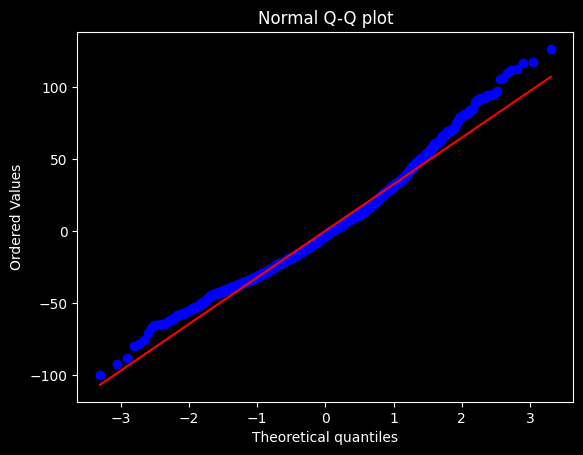

In [18]:
# check if residuals are normally distributed
stats.probplot(olsres.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [19]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 65.0, Predicted price: 96.1
Observed price: 64.0, Predicted price: 74.7
Observed price: 104.0, Predicted price: 95.5
Observed price: 70.0, Predicted price: 73.9
Observed price: 193.0, Predicted price: 115.2
Observed price: 40.0, Predicted price: 86.2
Observed price: 65.0, Predicted price: 92.3
Observed price: 50.0, Predicted price: 88.8
Observed price: 130.0, Predicted price: 79.1
Observed price: 70.0, Predicted price: 74.5


### Interpretation of results - tbd

<b>R-squared (coefficient of determination):</b> The first model has a value of 0.214 and the second model of 0.25. Hence the second model can explain more of the variation - sepcificially 25% of the variation of our target variable.

<b>Coefficients and p-values:</b> 
Model 1: The explanatory variable is highly significant with a p-value < 0.001 and has a positive coefficient. Hence, the number of how many people a listing can accomodates has a positive significant impact an listing prices. The binary variable lake access is not significant and thus excluded for the second model. 

Model 2: All variables are significant at an 5% significance level. However, the distance to tourist attractions has a coefficient of zero and hence does not influence prices strongly or nearly not at all. 

<b>Residuals:</b> The distribution of residuals appear to have a normal distribution, see Q-Q-plots. 

## Regression tree or random forest regression

### (5) Use of multiple linear regression, regression tree or random forest regression as the modeling method.
### (6) Model evaluation using suitable measures of fit (e.g. r-squared, rmse).
### (7) Correct interpretation of model results and measures of fit.